<a href="https://colab.research.google.com/github/lamaachi/MyDataScience_Projects/blob/main/draw_segments_in_image_cv_format.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

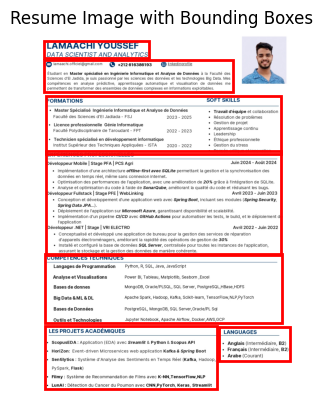

In [1]:
from PIL import Image, ImageDraw
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 1. --- Replace with your image file name ---
image_path = "CV LAMAACHI YOUSSEF AI 2025_page-0001.jpg"  # <--- PUT YOUR IMAGE FILE NAME HERE

# 2. --- Paste your JSON response here ---
json_response = """
{
  "predicted": [
    {
      "box": {
        "xmax": 1189,
        "xmin": 70,
        "ymax": 1059,
        "ymin": 566
      }
    },
    {
      "box": {
        "xmax": 881,
        "xmin": 65,
        "ymax": 1698,
        "ymin": 1399
      }
    },
    {
      "box": {
        "xmax": 1185,
        "xmin": 69,
        "ymax": 580,
        "ymin": 304
      }
    },
    {
      "box": {
        "xmax": 959,
        "xmin": 62,
        "ymax": 285,
        "ymin": 135
      }
    },
    {
      "box": {
        "xmax": 1193,
        "xmin": 65,
        "ymax": 1386,
        "ymin": 1058
      }
    },
    {
      "box": {
        "xmax": 561,
        "xmin": 63,
        "ymax": 128,
        "ymin": 44
      }
    },
    {
      "box": {
        "xmax": 1232,
        "xmin": 891,
        "ymax": 1563,
        "ymin": 1404
      }
    }
  ]
}
"""

# Load the JSON response
data = json.loads(json_response)

# Open the image using Pillow (PIL)
try:
    img = Image.open(image_path)
except FileNotFoundError:
    print(f"Error: Image file '{image_path}' not found. Make sure you uploaded it to Colab.")
    exit()

# Create a figure and axes for matplotlib to display the image
fig, ax = plt.subplots(1)
ax.imshow(img)

# Get drawing context
draw = ImageDraw.Draw(img)

# Iterate through the predicted boxes and draw them
for prediction in data["predicted"]:
    box = prediction["box"]
    xmin = box["xmin"]
    xmax = box["xmax"]
    ymin = box["ymin"]
    ymax = box["ymax"]

    # Calculate width and height of the bounding box
    width = xmax - xmin
    height = ymax - ymin

    # Create a Rectangle patch for matplotlib (more flexible for styling)
    rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor='red', facecolor='none')

    # Add the patch to the axes
    ax.add_patch(rect)

# Display the image with bounding boxes using matplotlib
plt.title("Resume Image with Bounding Boxes")
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()